In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.cluster import KMeans
import seaborn as sns
sns.set(style="white", color_codes=True)

In [2]:
data = pd.read_csv("Iris.csv")
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
species_list = list(data["Species"].unique())
#print(len(species_list))
X1=data.loc[data["Species"] == species_list[0]]
X2=data.loc[data["Species"] == species_list[1]]
X3=data.loc[data["Species"] == species_list[2]]


Text(0, 0.5, 'Sepal Width')

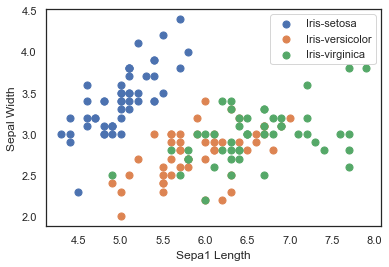

In [4]:

Y11=X1[["SepalLengthCm","SepalWidthCm"]]
#print(Y1)
Y21=X2[["SepalLengthCm","SepalWidthCm"]]
#print(Y2)
Y31=X3[["SepalLengthCm","SepalWidthCm"]]
#print(Y3)

figsize=(20,10)
plt.scatter(Y11["SepalLengthCm"],Y11["SepalWidthCm"],s=50)
plt.scatter(Y21["SepalLengthCm"],Y21["SepalWidthCm"],s=50)
plt.scatter(Y31["SepalLengthCm"],Y31["SepalWidthCm"],s=50)

plt.legend(species_list)
plt.xlabel('Sepa1 Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

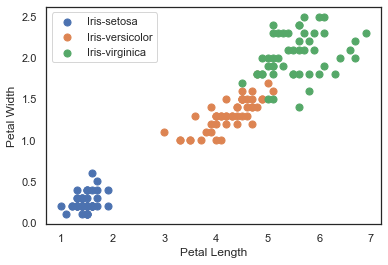

In [5]:
Y12=X1[["PetalLengthCm","PetalWidthCm"]]
#print(Y1)
Y22=X2[["PetalLengthCm","PetalWidthCm"]]
#print(Y2)
Y32=X3[["PetalLengthCm","PetalWidthCm"]]
#print(Y3)

figsize=(20,10)
plt.scatter(Y12["PetalLengthCm"],Y12["PetalWidthCm"],s=50)
plt.scatter(Y22["PetalLengthCm"],Y22["PetalWidthCm"],s=50)
plt.scatter(Y32["PetalLengthCm"],Y32["PetalWidthCm"],s=50)

plt.legend(species_list)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [6]:
########### PCA ############

# split data into features (X) and labels (y)
X = data.iloc[:,1:5]
y = data.iloc[:,-1]
print(X.head())
print(y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [7]:
#Feature Scaling

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)
X_scaled.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [8]:
#PCA

pca = decomposition.PCA(n_components = 2)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)

In [9]:
dfpc = pd.DataFrame(X_pca_array, columns=['PC1', 'PC2'])
dfpc['class'] = y
dfpc.head()

,PC1,PC2,class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


<Figure size 1000x1000 with 0 Axes>

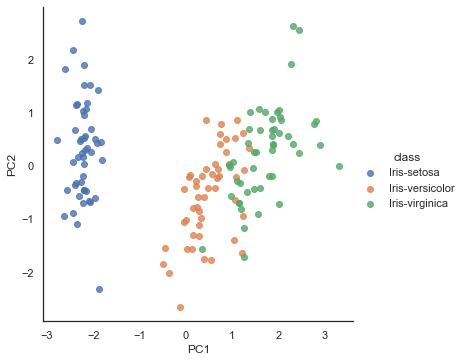

In [10]:
plt.figure(1, figsize=(10,10), dpi=100)
plt.clf()
sns.lmplot(data=dfpc, x="PC1", y="PC2", fit_reg=False, hue='class')
plt.show()

In [11]:
################## K Means ###################

#finding optimal k with elbow method.
def elbow(a):
    Error =[]


    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i).fit(a)
        Error.append(kmeans.inertia_)

    print(Error)
    plt.plot(range(1, 11), Error)
    plt.title('Elbow method')
    plt.xlabel('No of clusters')
    plt.ylabel('Error')
    plt.show()

[574.8058521688918, 198.70683592637363, 116.24247259315803, 89.75312441098951, 66.36791000282969, 57.16332524424726, 48.30250267358137, 39.854603159386514, 32.19406537095433, 28.71919396726006]


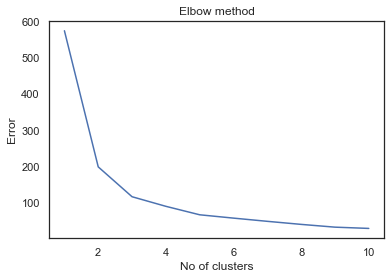

In [12]:
elbow(X_pca_array)

In [13]:
def cen():
    np.random.seed(100)
    k = 3

    centroids = {
        i+1: [np.random.randint(-2, 4), np.random.randint(-2, 3)]
        for i in range(k)
    }
    return centroids

In [14]:
centroids=cen()
print(centroids)

{1: [-2, -2], 2: [1, -2], 3: [0, 2]}


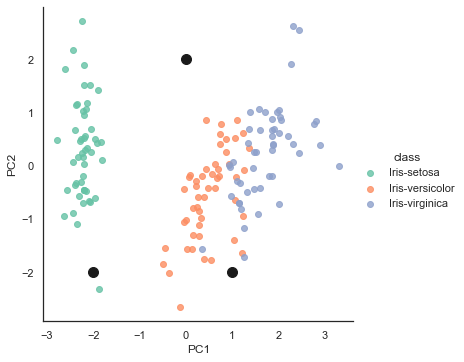

In [15]:
sns.lmplot(data=dfpc, x="PC1", y="PC2", fit_reg=False, hue='class', palette="Set2")
for i in centroids.keys():
    plt.scatter(*centroids[i], color='k', s=100)
   

plt.show()

In [18]:
def assignment(a, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        a['distance_from_{}'.format(i)] = (
            np.sqrt(
                (a['PC1'] - centroids[i][0]) ** 2
                + (a['PC2'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    a['closest'] = a.loc[:, centroid_distance_cols].idxmin(axis=1)
    a['closest'] = a['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    #a['color'] = a['closest'].map(lambda x: colmap[x])
    return a

        PC1       PC2        class  distance_from_1  distance_from_2  \
0 -2.264542  0.505704  Iris-setosa         2.519630         4.115311   
1 -2.086426 -0.655405  Iris-setosa         1.347370         3.366595   
2 -2.367950 -0.318477  Iris-setosa         1.721309         3.764387   
3 -2.304197 -0.575368  Iris-setosa         1.456747         3.598235   
4 -2.388777  0.674767  Iris-setosa         2.702874         4.317197   

   distance_from_3  closest  
0         2.713129        1  
1         3.377032        1  
2         3.313989        1  
3         3.455697        1  
4         2.731758        1  


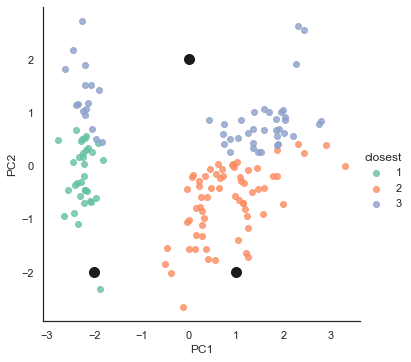

In [19]:
species_list = list(data["Species"].unique())

dfpc = assignment(dfpc, centroids)
print(dfpc.head())

#plt.scatter(dfpc['PC1'], dfpc['PC2'], c=dfpc['class'])
sns.lmplot(data=dfpc, x="PC1", y="PC2", fit_reg=False, hue='closest', palette="Set2")
for i in centroids.keys():
    plt.scatter(*centroids[i], color='k', s=100)
#ns.lmplot(data=dfpc, x="PC1", y="PC2", fit_reg=False, hue='class')
#plt.legend(species_list)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#first clustering resullt

In [20]:
import copy

old_centroids = copy.deepcopy(centroids)

In [21]:
#updating centroids

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(dfpc[dfpc['closest'] == i]['PC1'])
        centroids[i][1] = np.mean(dfpc[dfpc['closest'] == i]['PC2'])
    return k

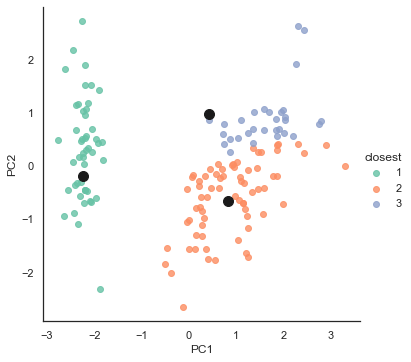

In [22]:
centroids = update(centroids)

dfpc = assignment(dfpc, centroids)

# Plot results
#plt.scatter(dfpc['PC1'], dfpc['PC2'], color=dfpc['color'])
sns.lmplot(data=dfpc, x="PC1", y="PC2", fit_reg=False, hue='closest', palette="Set2")
for i in centroids.keys():
    plt.scatter(*centroids[i], color='k', s=100)

#plt.legend(species_list)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [23]:
while True:
    closest_centroids = dfpc['closest'].copy(deep=True)
    centroids = update(centroids)
    dfpc = assignment(dfpc, centroids)
    if closest_centroids.equals(dfpc['closest']):
        break



C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Histogram of Cluster Counts of K-means'}, xlabel='closest', ylabel='count'>

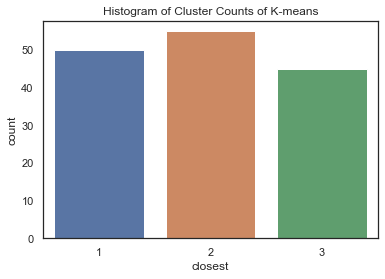

In [24]:
plt.ylabel('Count')
plt.title('Histogram of Cluster Counts of K-means')
sns.countplot(dfpc['closest'])

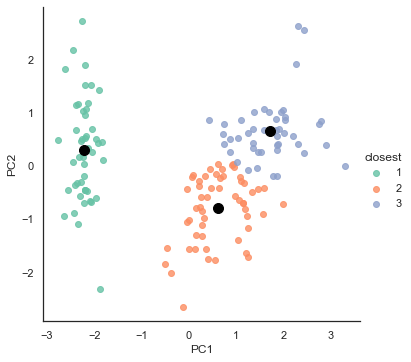

{1: [-2.220193280926465, 0.2922248196666738], 2: [0.6119839158952104, -0.799252625173953], 3: [1.718901081601927, 0.6521700755829718]}


In [25]:
sns.lmplot(data=dfpc, x="PC1", y="PC2", fit_reg=False, hue='closest', palette="Set2")
for i in centroids.keys():
    plt.scatter(*centroids[i], color='black', s=100)


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

print(centroids)